In [109]:
!pip install opencv-python

In [110]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [111]:
image = cv2.imread("download.jpg")

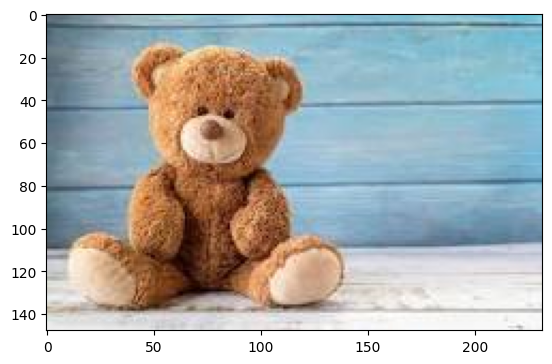

In [112]:
plt.imshow(cv2.cvtColor(image ,cv2.COLOR_BGR2RGB))

In [113]:
print(image)


[[[112 100  88]
  [113 101  89]
  [116 104  92]
  ...
  [219 204 118]
  [222 205 124]
  [223 209 127]]

 [[114 102  90]
  [115 103  91]
  [117 105  93]
  ...
  [214 197 116]
  [216 201 122]
  [220 204 127]]

 [[126 113  99]
  [125 112  98]
  [123 110  96]
  ...
  [219 200 127]
  [224 206 135]
  [228 210 139]]

 ...

 [[237 237 237]
  [236 236 236]
  [234 234 234]
  ...
  [246 246 246]
  [247 247 247]
  [250 250 250]]

 [[238 238 238]
  [237 237 237]
  [236 236 236]
  ...
  [245 245 245]
  [245 245 245]
  [248 248 248]]

 [[239 239 239]
  [239 239 239]
  [238 238 238]
  ...
  [245 245 245]
  [243 243 243]
  [244 244 244]]]


In [114]:
print('Type of the image : ' , type(image))
print()
print('Shape of the image : {}'.format(image.shape))
print('Image Hight {}'.format(image.shape[0]))
print('Image Width {}'.format(image.shape[1]))
print('Dimension of Image {}'.format(image.ndim))

Type of the image :  <class 'numpy.ndarray'>

Shape of the image : (148, 232, 3)
Image Hight 148
Image Width 232
Dimension of Image 3


In [115]:
print('Image size {}'.format(image.size))
print('Maximum RGB value in this image {}'.format(image.max()))
print('Minimum RGB value in this image {}'.format(image.min()))

Image size 103008
Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [116]:
print('Value of only R channel {}'.format(image[ 100, 50, 0]))
print('Value of only G channel {}'.format(image[ 100, 50, 1]))
print('Value of only B channel {}'.format(image[ 100, 50, 2]))

Value of only R channel 63
Value of only G channel 112
Value of only B channel 174


In [117]:
def load_image(path):
    image =cv2.imread(path)
    if image.shape[2] ==3:
        return image
    else:
        return cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

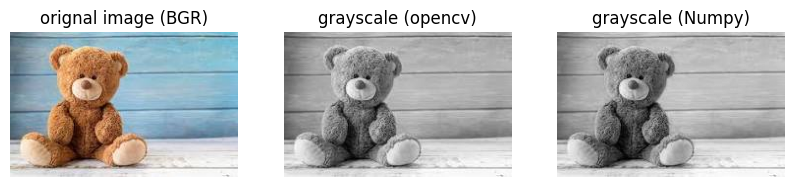

In [118]:
image = load_image("download.jpg")

gray_cv2=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
weights = [0.2989, 0.5870, 0.1140]
gray_numpy= np.dot(image, weights).astype(np.uint8)

plt.figure(figsize=(10,10))

plt.subplot(131)
plt.title("orignal image (BGR)")
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(132)
plt.title("grayscale (opencv)")
plt.imshow(gray_cv2,cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title("grayscale (Numpy)")
plt.imshow(gray_numpy,cmap='gray')
plt.axis('off')

plt.show()

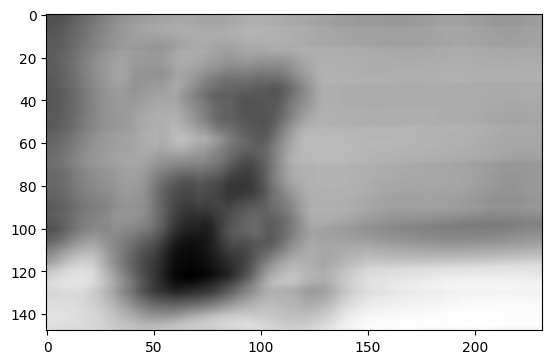

In [119]:
def apply_averaging_filter(image, kernel_size=20):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)

    #[1 1 1
    # 1 1 1
    # 1 1 1]

    #[0.1 0.1 0.1
    # 0.1 0.1 0.1
    # 0.1 0.1 0.1]

    return cv2. filter2D(image, -1, kernel)


avg_image = apply_averaging_filter (gray_cv2)
plt. imshow(avg_image, cmap="gray")

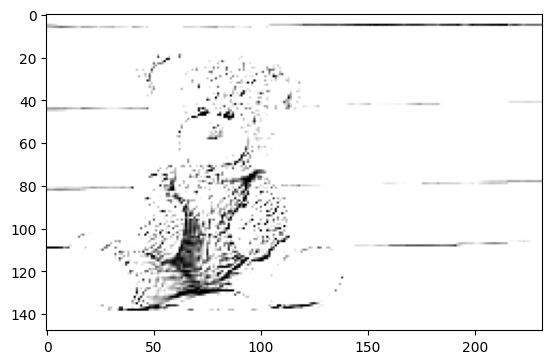

In [120]:
def apply_sharp_filter(image):

    kernel=np.array([[-1,-1,1],
                     [1,7,-1],
                     [-1,-1,-1]])
    return cv2.filter2D(image,-1,kernel)

def apply_gaussian_filter(image,kernel_size=15):

    return cv2.GaussianBlur(image,(kernel_size,kernel_size),0)

image=cv2.imread("download.jpg",cv2.IMREAD_GRAYSCALE)


sharp_img=apply_sharp_filter(image)
plt.imshow(sharp_img,cmap="gray")

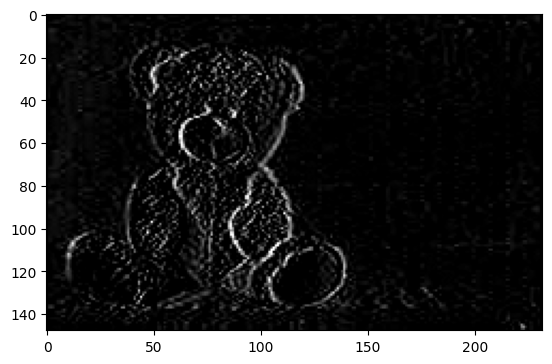

In [121]:
def apply_sharp_filter(image):

    kernel=np.array([[1,0,-1],
                     [-2,0,2],
                     [-1,0,1]])
    return cv2.filter2D(image,-1,kernel)

def apply_gaussian_filter(image,kernel_size=0):

    return cv2.GaussianBlur(image,(kernel_size,kernel_size),0)

image=cv2.imread("download.jpg",cv2.IMREAD_GRAYSCALE)


sharp_img=apply_sharp_filter(image)
plt.imshow(sharp_img,cmap="gray")

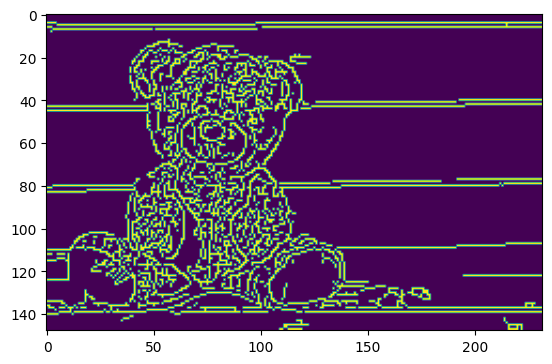

In [122]:
t_lower = 60
t_upper = 140

XXX = cv2.Canny(image, t_lower, t_upper)

plt.imshow(XXX)

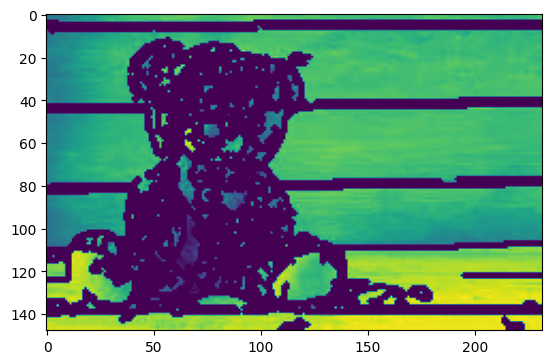

In [123]:
contours, _ = cv2.findContours(XXX, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(cv2.drawContours(image, contours, -1, (0, 255, 0), 2))

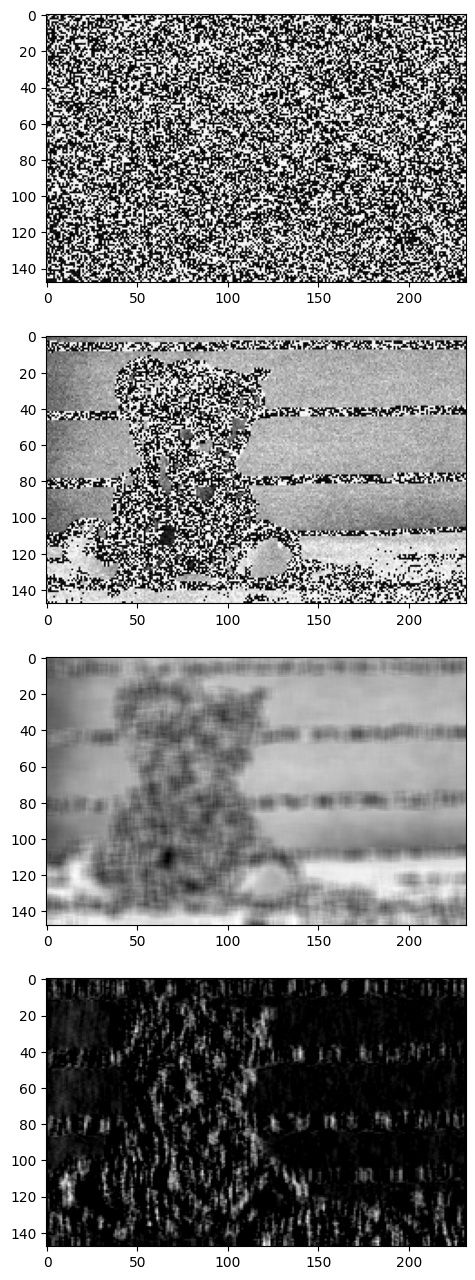

In [124]:
noise = np.random.normal(0, 15, image.shape).astype(np.uint8)

# Add noise to the image
image_with_noise = image + noise

# Simple Noise Reduction (averaging filter)
kernel = np.ones((7, 7), np.float32) / 49
smoothed_cv2 = cv2.filter2D(image_with_noise, -1, kernel)
sharpened= apply_sharp_filter(smoothed_cv2)


# Plotting
plt.figure(figsize=(16, 16))
plt.subplot(411)
plt.imshow(noise, cmap="gray")
plt.subplot(412)
plt.imshow(image_with_noise, cmap="gray")
plt.subplot(413)
plt.imshow(smoothed_cv2, cmap="gray")
plt.subplot(414)
plt.imshow(sharpened, cmap="gray")
plt.show()